Here, we aim to integrate differential analysis results (treated vs. non-treated) toward making a final list of genes which are significantly methylated, expressed and stabilized.

=> table of these genes with all logFCs, pvalues and screening scores.

<!-- # Select target genes

## Rho_down & Exp_down & Hyper_m6A

'SQLE', 'INTS5'
#### SQLE 
> Value of SQLE Expression in Prognostic Evaluation of Patients with Acute Myeloid Leukemia - https://pubmed.ncbi.nlm.nih.gov/33554790/


#### INTS5
> Coordinated Alterations in RNA Splicing and Epigenetic Regulation Drive Leukemogenesis - https://www.nature.com/articles/s41586-019-1618-0
>> Transcriptional pausing was also evident at INTS5 and INTS14 in SRSF2 mutant cells (Extended Data Fig. 7r, ​,s),s), which, in combination with aberrant splicing of several Integrator subunits (Supplementary Table 24), suggested impaired function of the entire Integrator complex in SRSF2 mutant cells -->

In [1]:
import sys 
import pandas as pd 
import numpy as np
from matplotlib.pyplot import subplots
from itertools import chain, product
from venn import venn 

sys.path.append('../')

from util import *

In [2]:
# wd = '/rumi/shams/abe/Projects/Decitabine-treatment/'
wd = '/data_gilbert/home/aarab/Projects/Decitabine-treatment'

# Intersectional genes

## Load data
Comparing treated with Decitabine vs. non-treated:
- **$\Delta$RNA methylation**  (hl60 cell line)
- **$\Delta$Translational efficiency** (hl60 cell line)
- **$\Delta$RNA expression** (For all 6 AML cell lines)
- **$\Delta$RNA stability** (For all 6 AML cell lines)
- **$\Delta$Phenotype, CRISPRi-screen $\rho$(rho) score** (hl60 and molm13 cell lines) 

In [3]:
comps = load_data(comparisons=True,wd=wd)

In [4]:
scrns = load_data(screens=True,wd=wd)

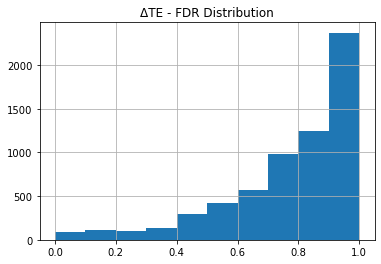

In [49]:
comps['delta_te'].iloc[:,2].hist()
plt.title('ΔTE - FDR Distribution')
plt.show()

Find top genes across all cell lines and high throughput experiments:


In [261]:
Top = {}

In [316]:
Top['Mtyl'] = set_Top_Mtyl(1,0.05,data=comps)
print('_'*30)
Top['Rho'] = set_Top_Rho(0.1,0.05,data=scrns)
print('_'*30)
Top['TE']   = set_Top_TE  (0.1,0.20,data=comps)
print('_'*30)
Top['Exp']  = set_Top_Exp (0.1,0.05,data=comps,comp='hl60_72h')
print('_'*30)
Top['Stbl'] = set_Top_Stbl(0.1,0.05,comps)

Subset Top Mtyl data frame:
up:  1704
down: 1210
(fc_thr=1, pv_thr=0.05)
______________________________
Subset Top Rho data frame:
(hl60 / exp1 / DAC)
(sc_thr=0.1, pv_thr=0.05)
up:  592
down: 701
______________________________
Subset Top TE data frame:
up:  157
down: 41
(te_thr=0.1, fdr_thr=0.2)
______________________________
Subset Top Exp data frame:
up:  3512
down: 2732
(hl60_72h)
(fc_thr=0.1, pv_thr=0.05
______________________________
Subset Top Stbl data frame:
up:  228
down: 158
(hl60_72h)
(fc_thr=0.1, pv_thr=0.05


#### Add `hl60_72h_only` result to `Top_Exp`

In [317]:
u,d,_ = set_Top_Exp (0.1,0.05,data=comps,comp='hl60_72h_only').items()

Subset Top Exp data frame:
up:  1579
down: 1148
(hl60_72h_only)
(fc_thr=0.1, pv_thr=0.05


### Intersection of all genes across different datasets

Select top gene names 

In [319]:
Exp_up = set(Top['Exp']['up'].gene_name.to_list() + u[1].gene_name.tolist())
Rho_up = set(Top['Rho']['up'].index.tolist())
Stbl_up = set(Top['Stbl']['up'].gene_name.tolist())
TE_up = set(Top['TE']['up'].gene_name.tolist())
Hyper_m6A = set(Top['Mtyl']['up'].gene_name.tolist())

Exp_down = set(Top['Exp']['down'].gene_name.tolist() + d[1].gene_name.tolist())
Stbl_down = set(Top['Stbl']['down'].gene_name.tolist())
Rho_down = set(Top['Rho']['down'].index.tolist())
TE_down = set(Top['TE']['down'].gene_name.tolist())
Hypo_m6A = set(Top['Mtyl']['down'].gene_name.tolist())

In [320]:
'SQLE' in Exp_down  and 'INTS5'in Exp_down

True

## Plots

### UpSet plots 

In [321]:
import upsetplot as us
from matplotlib.backends.backend_pdf import PdfPages

In [322]:
upset_data = {
    'Hyper_m6A':Hyper_m6A,
    # 'Hypo_m6A':Hypo_m6A,

    'Exp_up':Exp_up,
    'Rho_up':Rho_up,
    'Stbl_up':Stbl_up,
    'TE_up':TE_up,

    'Exp_down':Exp_down,
    'Stbl_down':Stbl_down,
    'Rho_down':Rho_down,
    'TE_down':TE_down
}

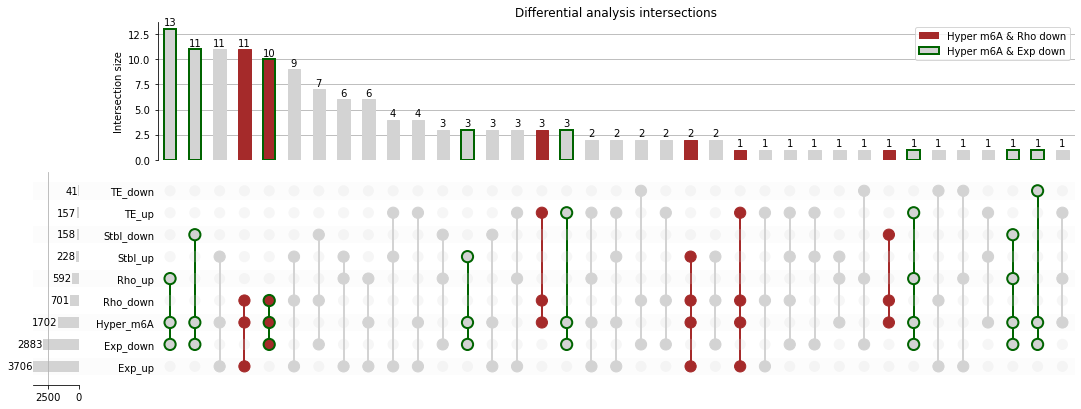

In [408]:
with PdfPages('intersectional-genes/comparisons_upset_plot.pdf') as pdf:
    # Hyper_m6A_upset_data
    fig1 = plt.figure()
    upset1 = us.UpSet(
        us.from_contents(upset_data),
        min_degree=3,
        sort_by='cardinality',
        # orientation='vertical',
        show_counts=True,
        # totals_plot_elements=
        other_dots_color=0.2,
        facecolor='lightgrey'
    )
    upset1.style_subsets(
        present=["Rho_down","Hyper_m6A"], 
        # absent='Hypo_m6A',
        label="Hyper m6A & Rho down", 
        facecolor='brown'
        #, edgecolor='dimgrey',linewidth=0.5,linestyle='--'
    )
    
    upset1.style_subsets(
        present=["Exp_down","Hyper_m6A"], 
        # absent='Hypo_m6A',
        label="Hyper m6A & Exp down", 
        # facecolor='brown', 
        edgecolor='darkgreen',linewidth=2#,linestyle='--'
    )

    upset1.plot(fig=fig1)
    plt.title('Differential analysis intersections',fontsize=12)
    pdf.savefig(bbox_inches='tight')

### Venn diagrams
- https://pypi.org/project/venn/


In [324]:
def iter_by_two(input1,input2,input3):
    # inputs are variable names 
    # it will give 8 combinations 
    out = []
    for comb in list(product(input1,input2,input3)):
        a,b,c = comb
        out.append([a,b,c])
    return out 


def prep_studeis(first,second,extra=None):
    studies = iter_by_two([f'{first}_up', f'{first}_down'],[f'{second}_up', f'{second}_down'],['Hyper_m6A', 'Hypo_m6A'])
    if extra: studies = [[s[0].replace(first,extra),s[0],s[1],s[2]] for s in studies]
    return studies

def plot_combinations(studies):
    _, top_axs = subplots(ncols=4, nrows=1, figsize=(18, 8),dpi=500)
    _, bot_axs = subplots(ncols=4, nrows=1, figsize=(18, 8),dpi=500)
    # cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
    # letters = iter(ascii_uppercase)

    for std,ax in zip(studies,chain(top_axs, bot_axs)):
        data = {}
        data = dict([[a,set(eval(a))] for a in std])
        venn(data,fontsize=10,legend_loc="upper left", ax=ax)

#### Expression, Stability and _rho_

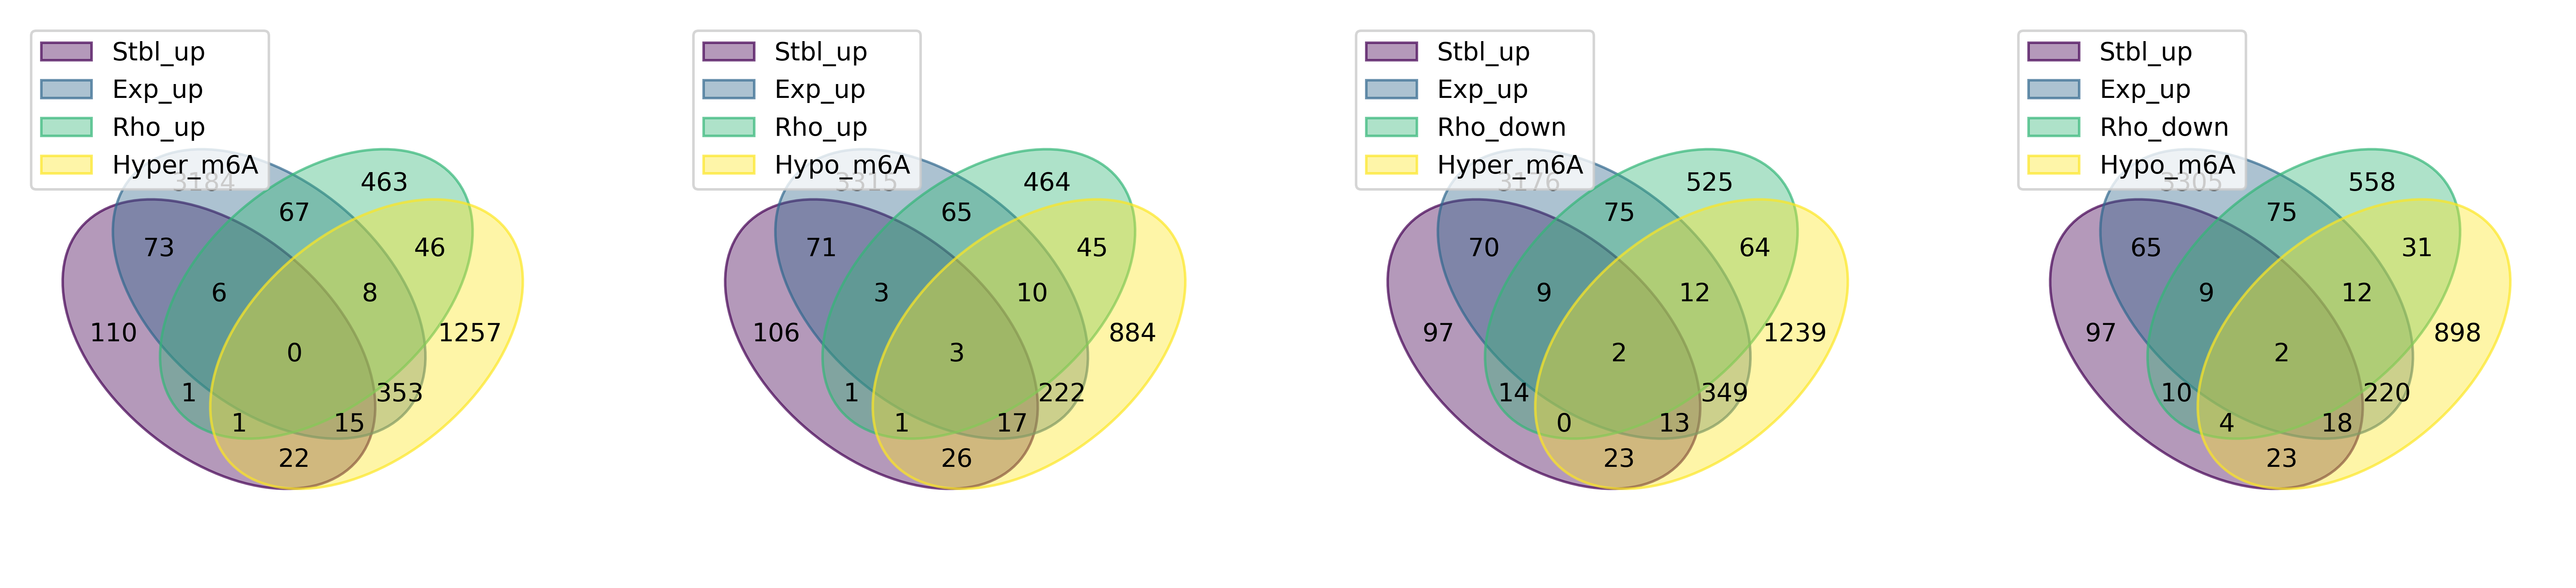

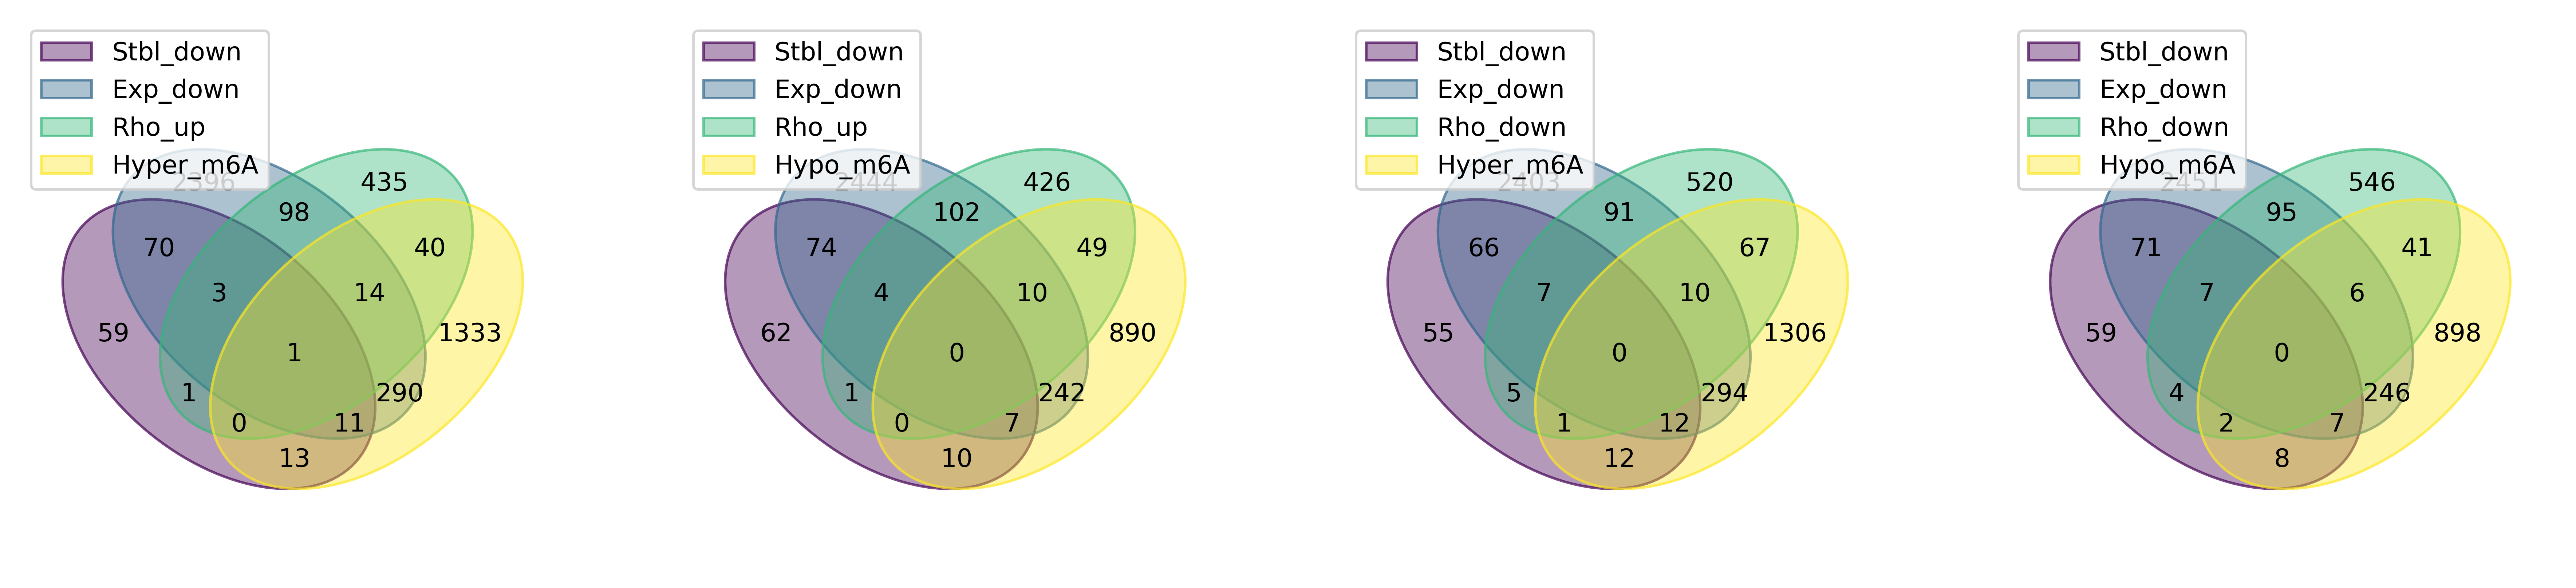

In [325]:
first = 'Exp'
second= 'Rho'
extra = 'Stbl'

plot_combinations(
    prep_studeis(first,second,extra)
)

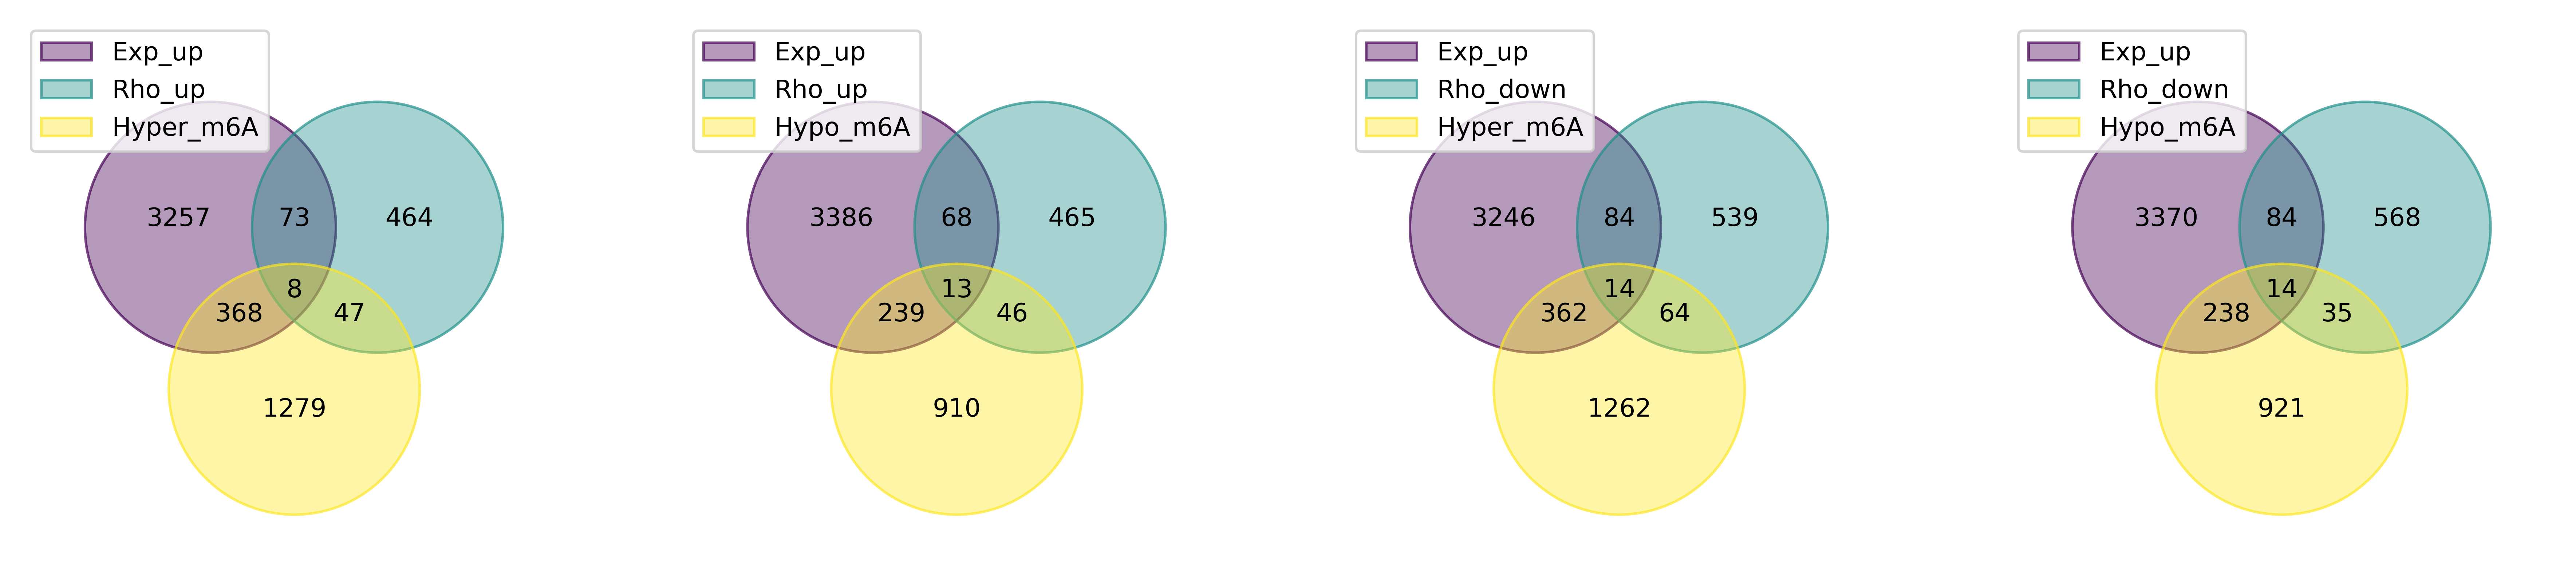

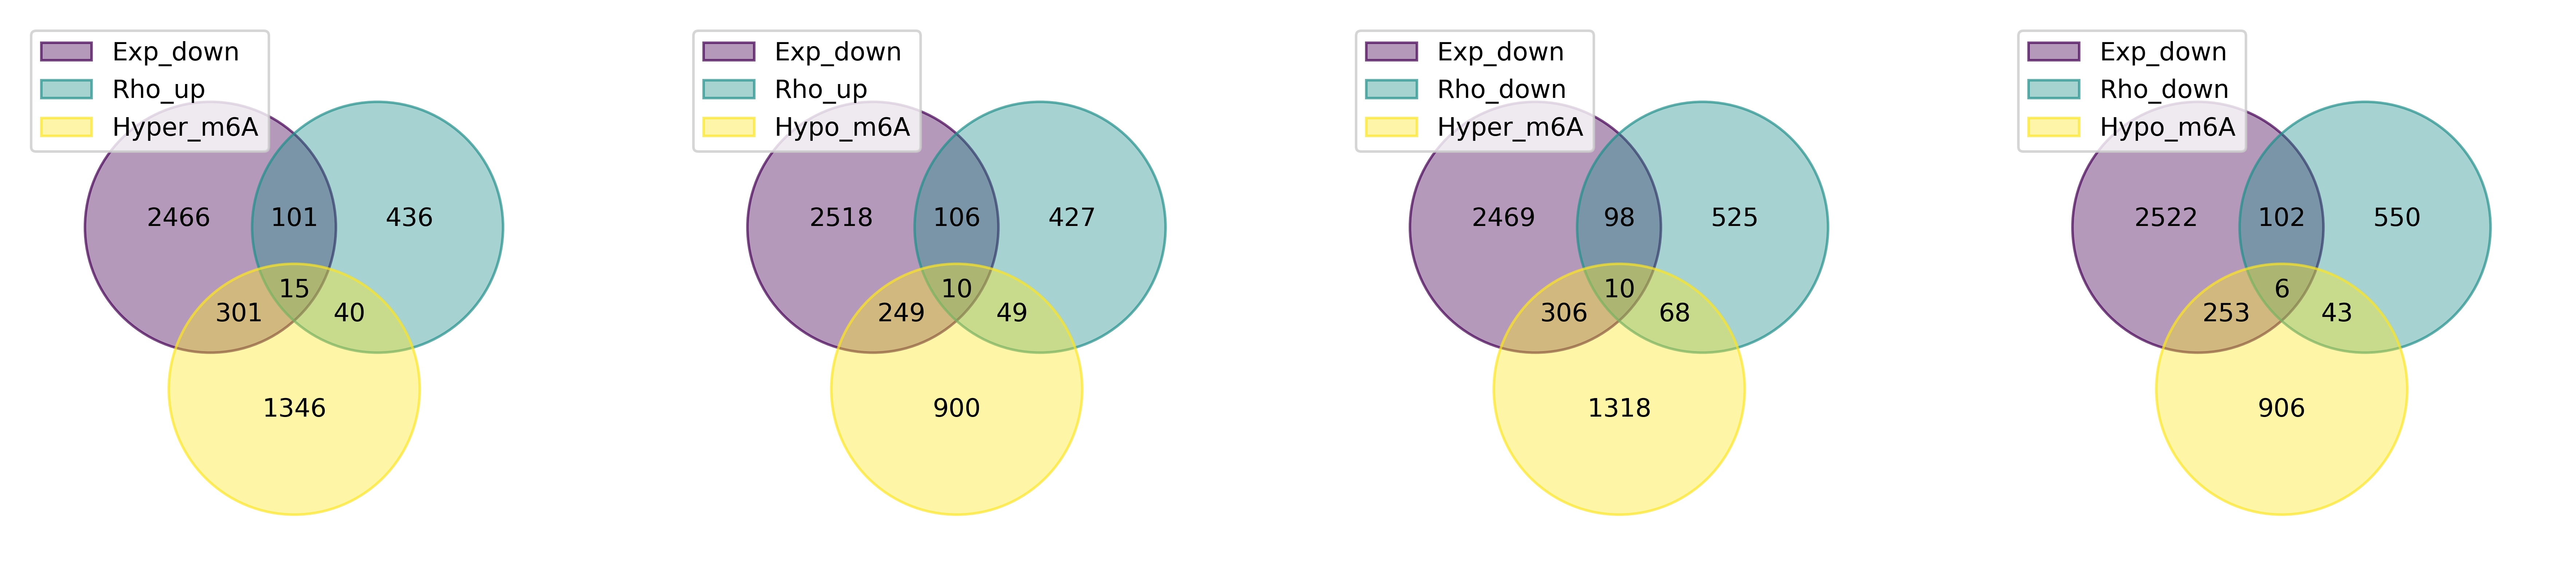

In [326]:
first = 'Exp'
second= 'Rho'

plot_combinations(
    prep_studeis(first,second)
)

#### TE combinations

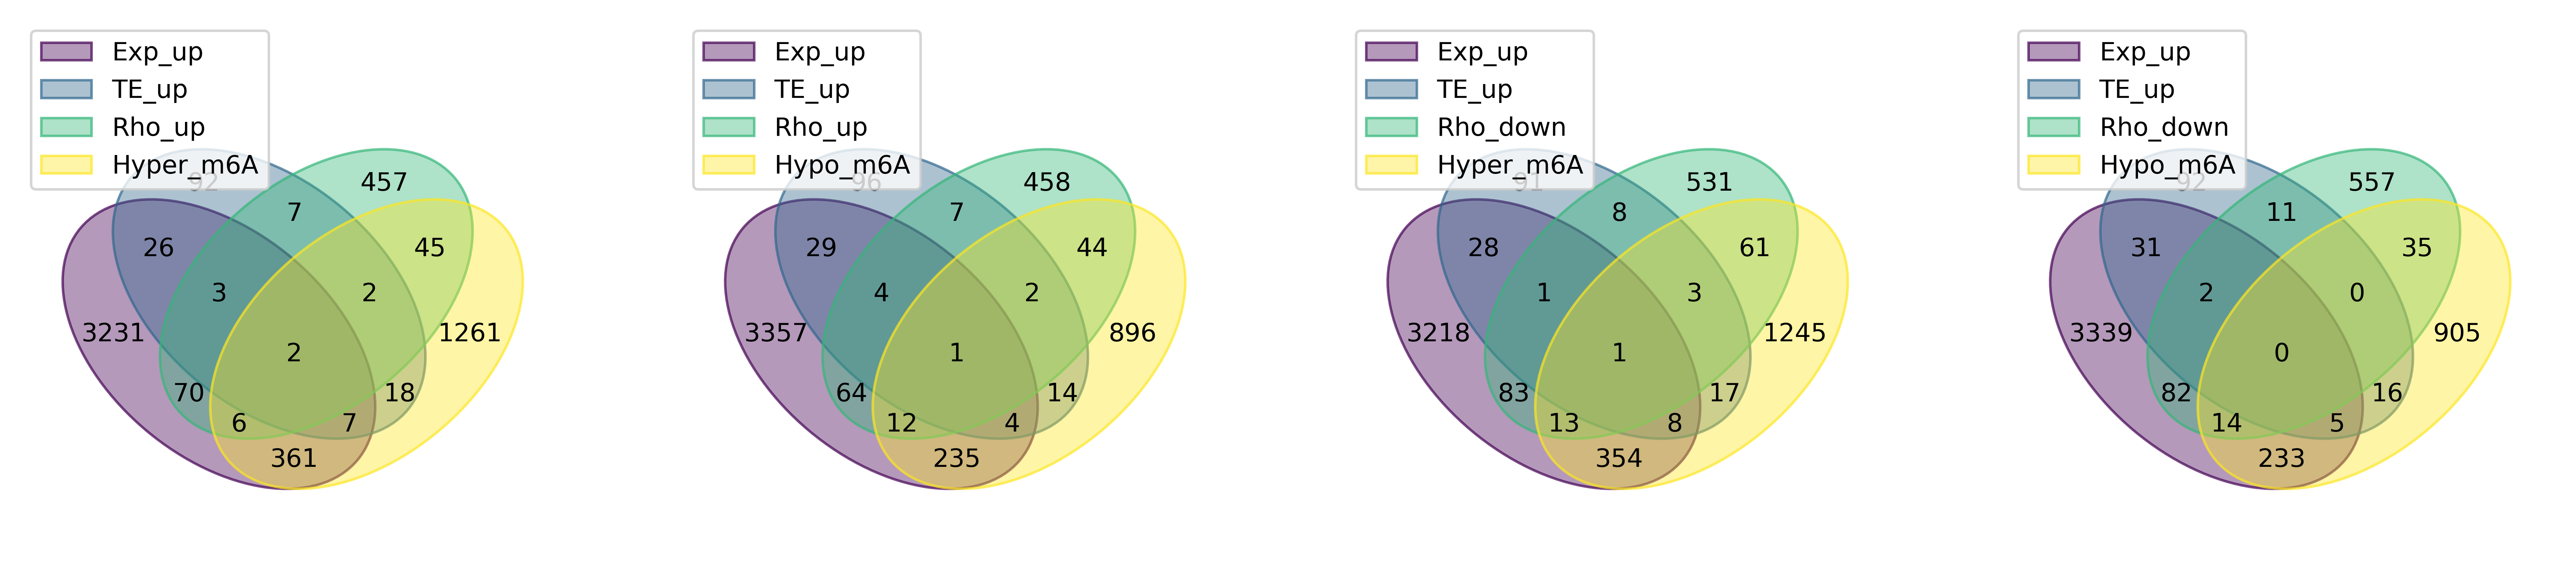

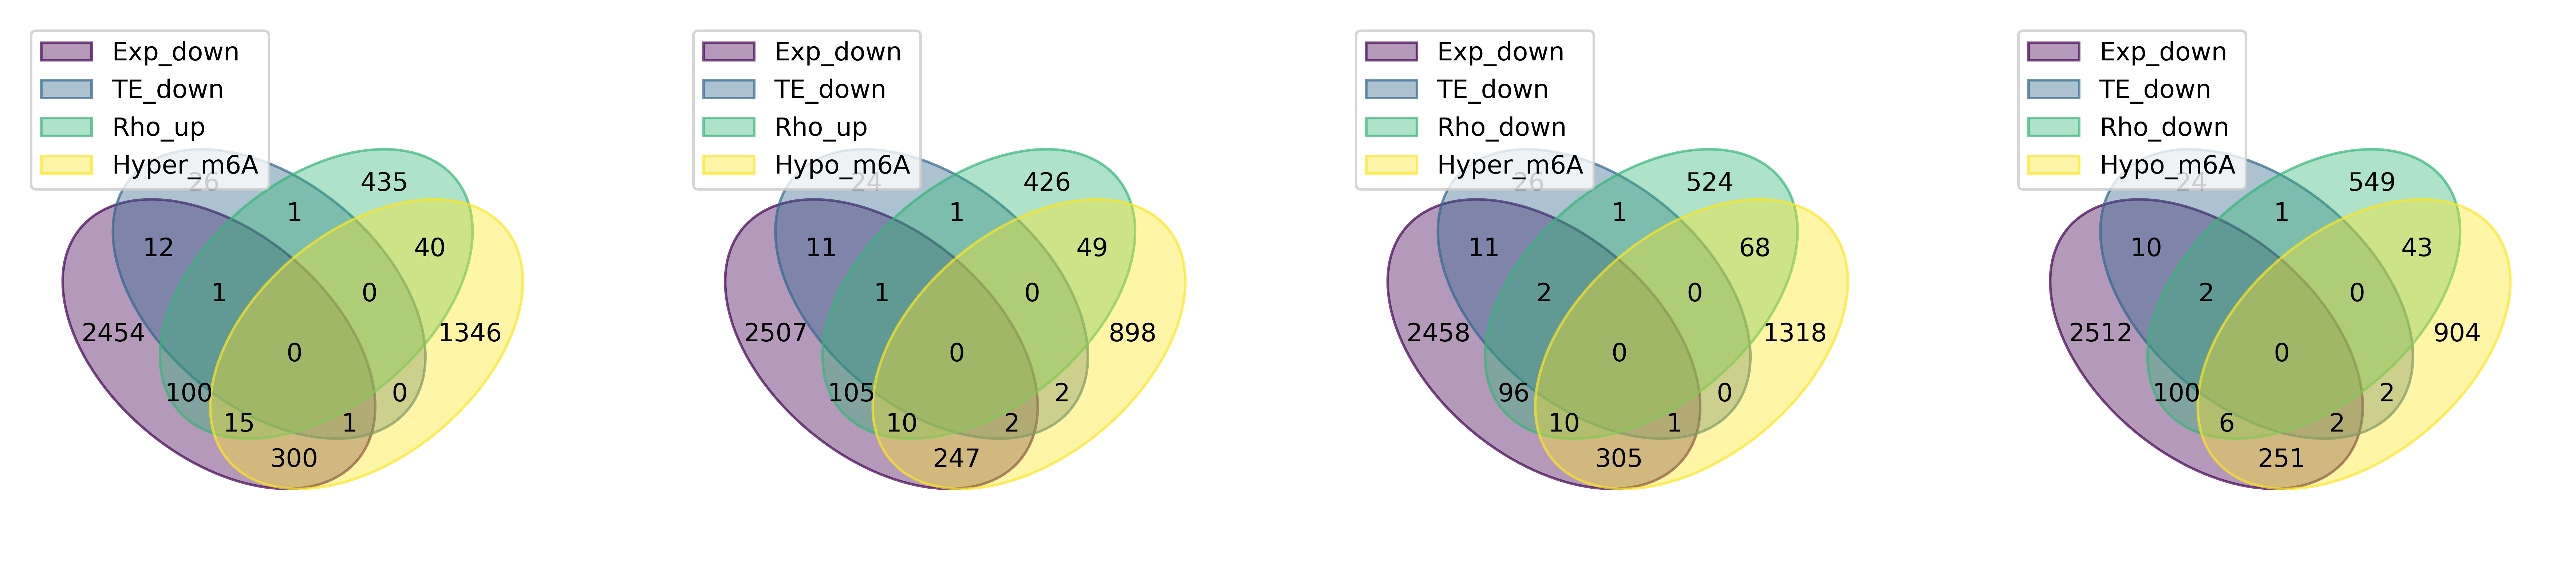

In [327]:
first = 'TE'
second= 'Rho'
extra = 'Exp'
plot_combinations(
    prep_studeis(first,second,extra)
)

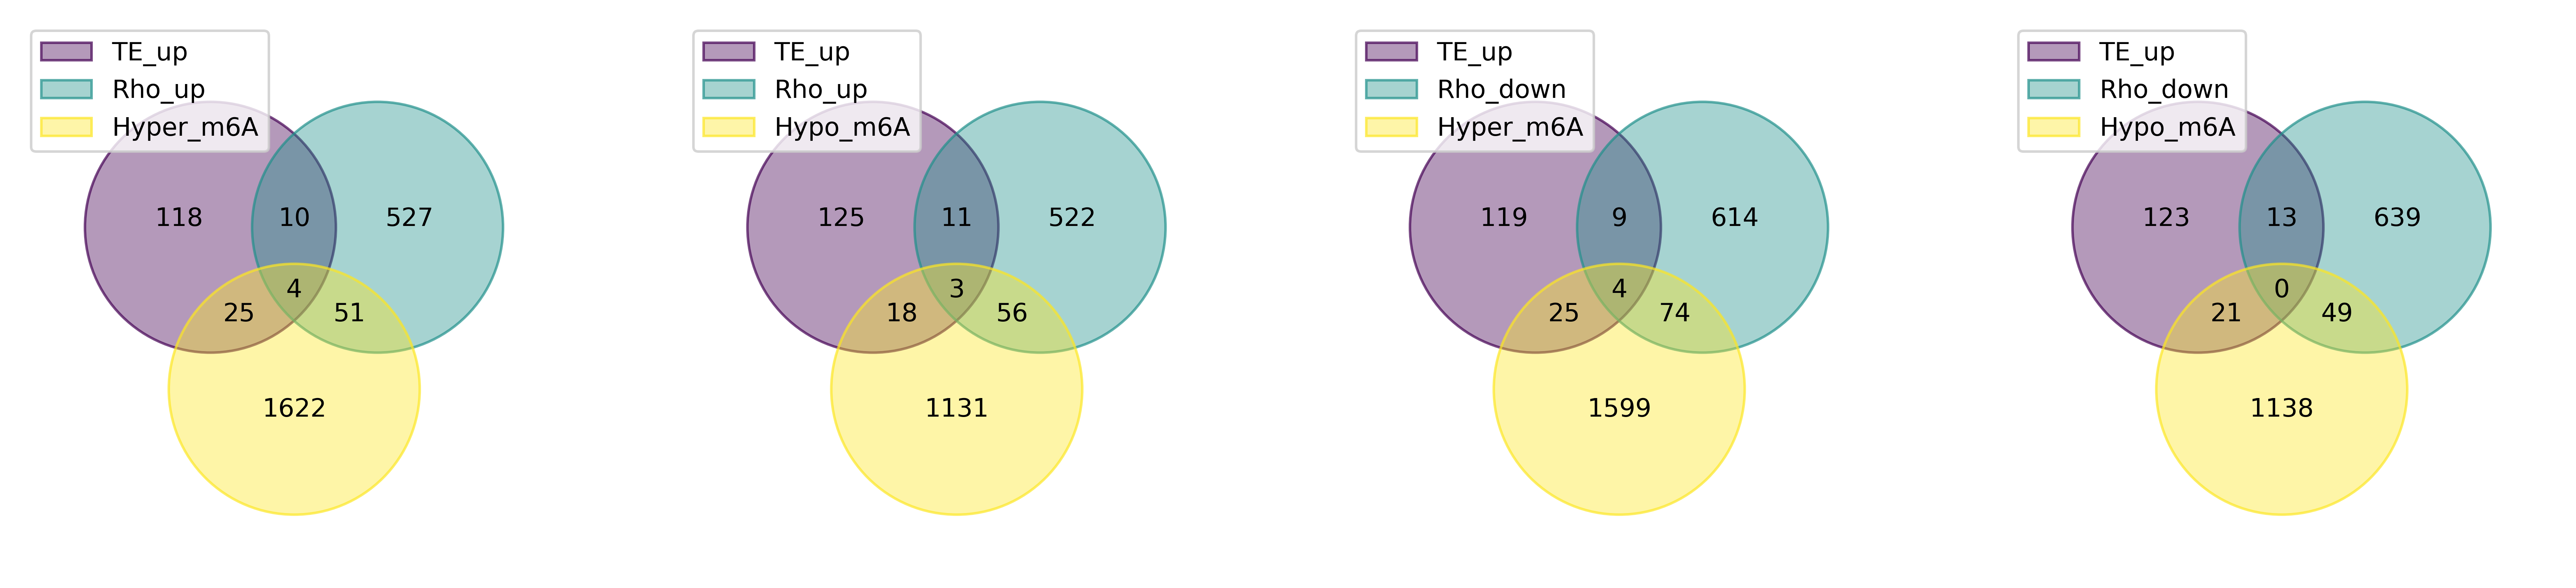

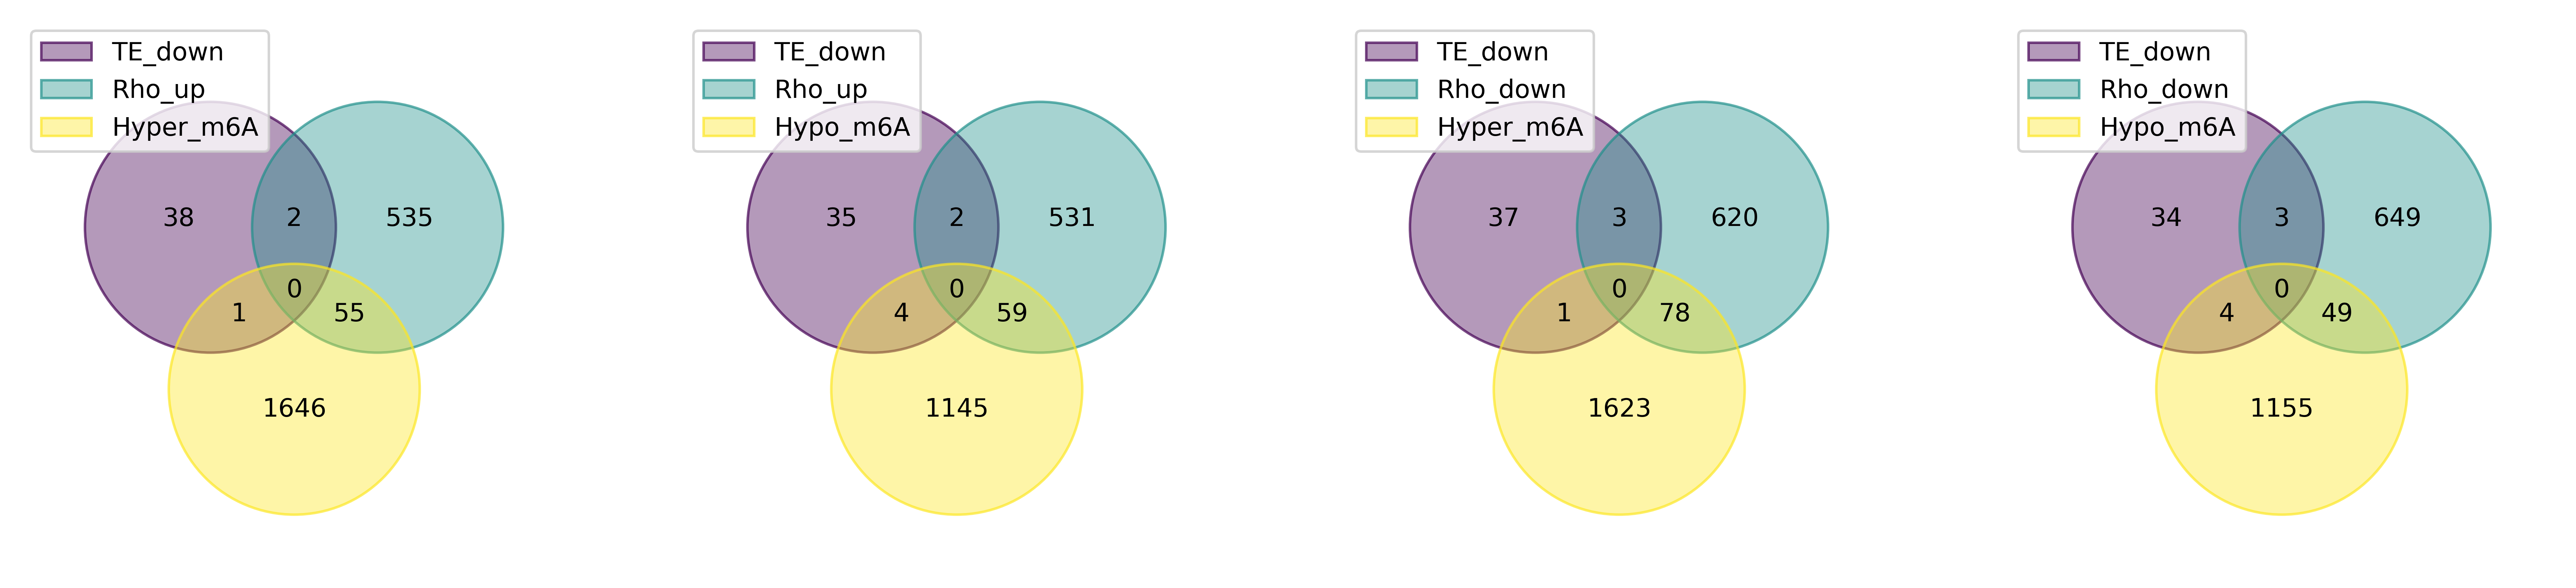

In [328]:
first = 'TE'
second= 'Rho'

plot_combinations(
    prep_studeis(first,second)
)

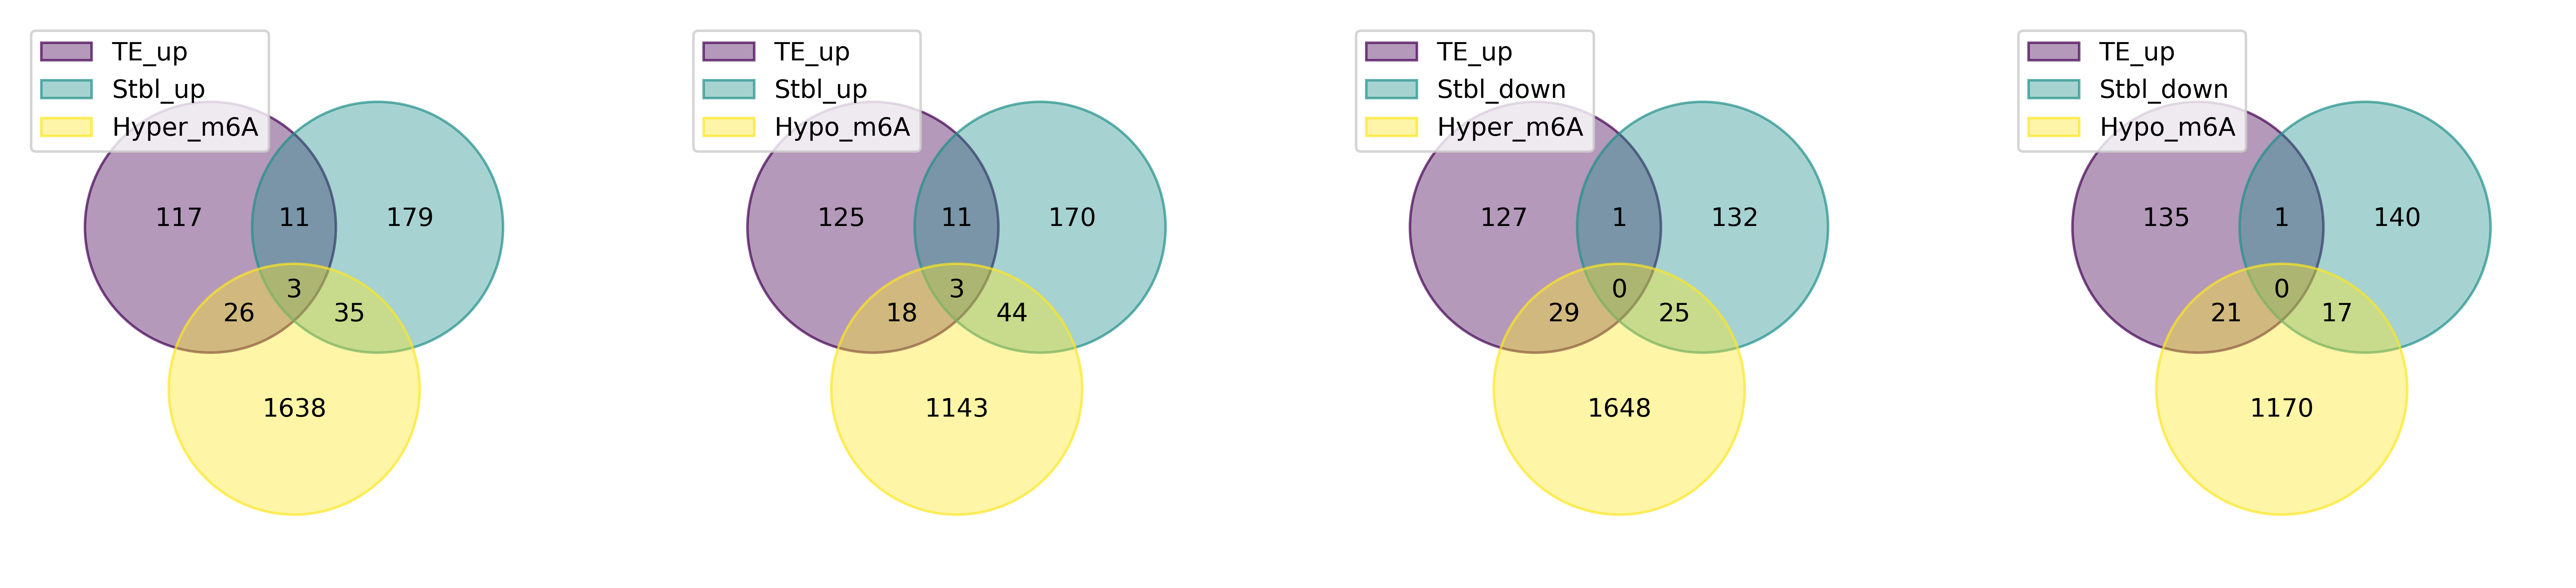

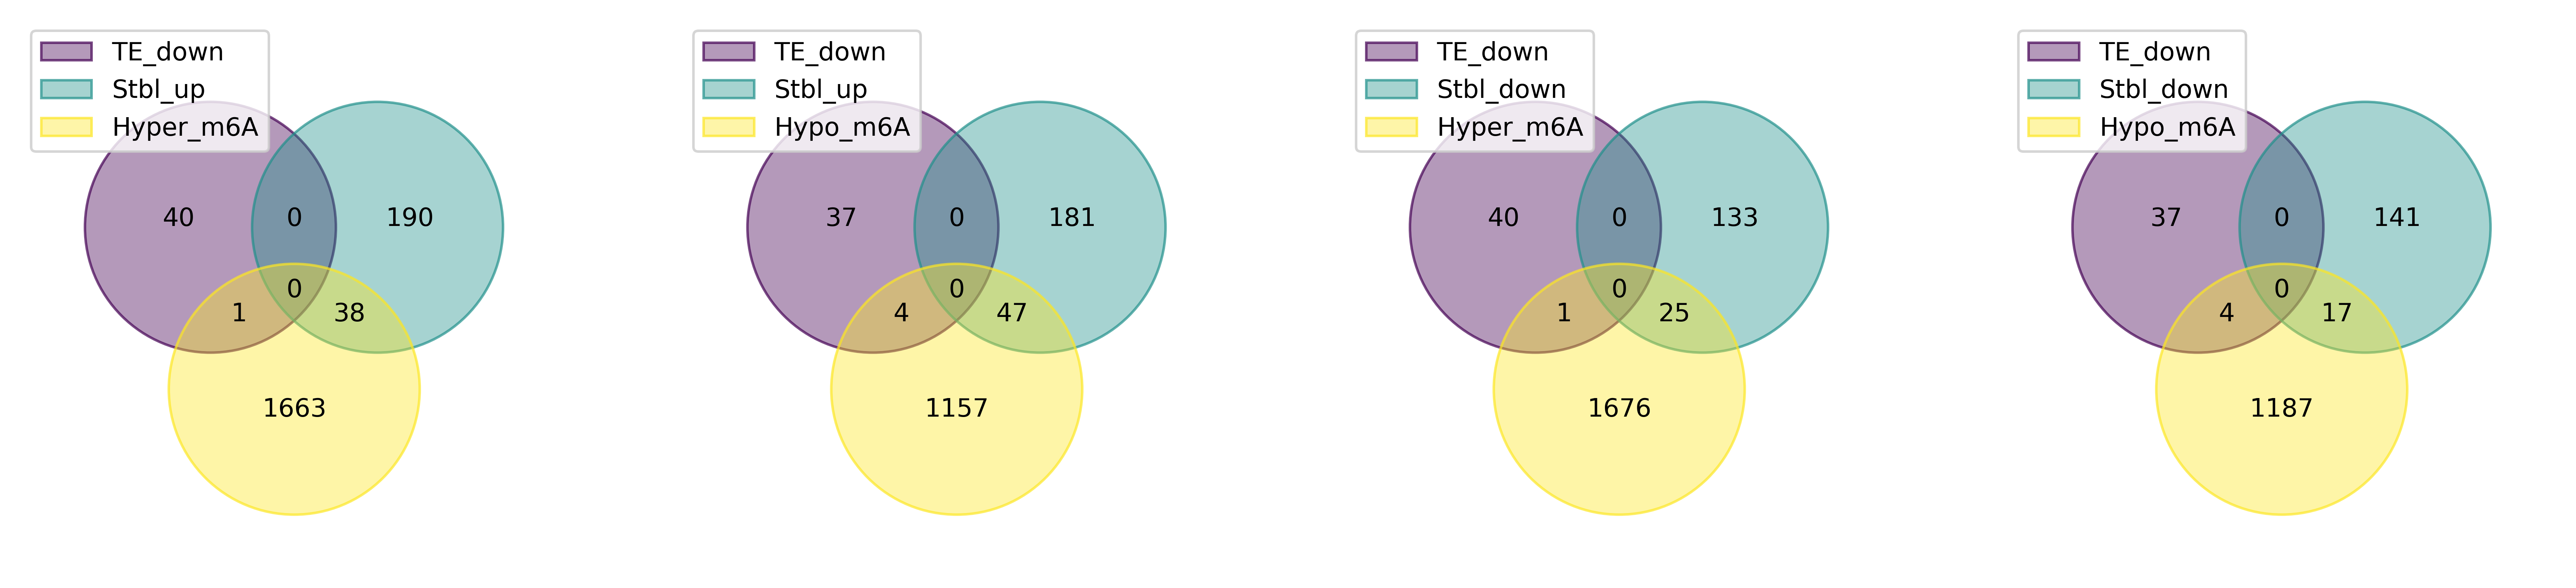

In [329]:
first = 'TE'
second= 'Stbl'

plot_combinations(
    prep_studeis(first,second)
)

## Generate final merged table

In [453]:
all_genes = {}
all_genes_list = []

for i,j,k in iter_by_two(['up', 'down'],['up', 'down'],['Hyper', 'Hypo']):
    
    for third in ['Exp','TE','Stbl']:
        name = f'Rho_{i} & {k}_m6A & {third}_{j}'
        genes = list(set(eval(f'Rho_{i}')).intersection(eval(f'{k}_m6A'),eval(f'{third}_{j}')))
        all_genes[name] = genes
        all_genes_list = all_genes_list + genes
        
all_genes_list = set(all_genes_list)

In [454]:
def get_intersect_df(genes, data, key=None):
    # get intersects 
    if key is not None: 
        df = data[key]
    else: 
        df = data

    out = df.iloc[[i for i, g in enumerate (df.gene_name) if g in list(genes)],]

    return out


def make_comp_final_table(genes,data):
    E = get_intersect_df(genes, data['delta_exp'])
    S = get_intersect_df(genes, data['delta_stbl'])
    T = get_intersect_df(genes, data['delta_te'])

    out = pd.DataFrame(index=genes)

    out = pd.concat([
        out,
        # RNA Expression
        E.reset_index(drop=True).set_index('gene_name').add_prefix('Exp.'),
        # RNA Stability 
        S.reset_index(drop=True).set_index('gene_name').add_prefix('Stbl.'),
        # Translational Efficiency
        T.reset_index(drop=True).set_index('gene_name').add_prefix('TE.'),
    ],axis=1)

    out = out.round(5)
    return out

def make_scrn_final_table(genes,data):
    return merge_screen_data(
        cells= ['hl60','molm13'], 
        exps = ['exp1','exp2','exp'], 
        drugs=['DAC'], 
        scores = ['gamma','rho'], data=data
    ).loc[genes,:]

def make_mtyl_final_table(genes):
    mtyl_bed12 = pd.read_csv('../meRIP-seq/hl60_delta_mtyl_table.txt',sep='\t').rename(columns={'name':'gene_name'})
    M = get_intersect_df(genes,mtyl_bed12)

    # RNA Methylation 
    out = M.reset_index(drop=True)
    return out 

### Write excel file 

In [497]:
# multi index
out = pd.DataFrame(
    [key.split(' & ') + [val] for key, value in all_genes.items() 
     for val in value if value]
).rename({0:'1st',1:'2ed',2:'3ed',3:'gene_name'},axis=1)

sheet1 = make_comp_final_table(genes = all_genes_list,data = comps).loc[out.gene_name,:].set_index(pd.MultiIndex.from_frame(out))
sheet2 = make_scrn_final_table(genes = all_genes_list,data = scrns).loc[out.gene_name,:].set_index(pd.MultiIndex.from_frame(out))
sheet3 = make_mtyl_final_table(genes = all_genes_list)

In [500]:
# intersections
writer = pd.ExcelWriter(f'intersectional-genes/differential-analysis-values.xlsx', engine='xlsxwriter')

sheet1.to_excel(writer, sheet_name='Comparisons')
sheet2.to_excel(writer, sheet_name='CRISPRi-screens')
sheet3.to_excel(writer, sheet_name='Methylation',index=False)

writer.save()

In [338]:
for key, value in all_genes.items():
    if value: 
        print(key)
        for val in value: 
            print(f'\t{val}')
        print('_'*30)

Rho_up & Hyper_m6A & Exp_up
	TET2
	MKI67
	CREBBP
	ARID4B
	BCORL1
	SLC38A2
	ZNF44
	CEP152
______________________________
Rho_up & Hyper_m6A & TE_up
	EIF4G1
	CEP152
	MKI67
	THRAP3
______________________________
Rho_up & Hyper_m6A & Stbl_up
	YLPM1
______________________________
Rho_up & Hypo_m6A & Exp_up
	MANBA
	SHOC2
	MKI67
	CREBBP
	HNRNPR
	CDK2
	ARID4B
	TACC3
	SKIL
	CBX8
	ZC3H13
	BCLAF1
	KLF7
______________________________
Rho_up & Hypo_m6A & TE_up
	HNRNPU
	MKI67
	DGKZ
______________________________
Rho_up & Hypo_m6A & Stbl_up
	YLPM1
	HNRNPR
	SHOC2
	ZC3H13
______________________________
Rho_up & Hyper_m6A & Exp_down
	KTI12
	EIF1AD
	ZBTB24
	YTHDF2
	MBD6
	POLR1C
	PET117
	GEMIN4
	TTI1
	EIF4G1
	KLF16
	SPOP
	MRPL17
	RBFA
	SLC38A5
______________________________
Rho_up & Hyper_m6A & Stbl_down
	SPOP
______________________________
Rho_up & Hypo_m6A & Exp_down
	DCTPP1
	ELP5
	HPS4
	PTBP1
	TTI1
	FDFT1
	ZNF787
	KLF16
	RPUSD2
	MIOS
______________________________
Rho_down & Hyper_m6A & Exp_up
	TTC14
	

# ComplexHeatmap

In [39]:
%reload_ext rpy2.ipython

In [43]:
%%R 
suppressMessages(suppressWarnings(library (tidyverse)))
suppressMessages(suppressWarnings(library (ggplot2)))
suppressMessages(suppressWarnings(library (patchwork)))

plot_Save <- function (p, name_it){
    ggsave(paste(name_it,'png',sep='.'), plot = p, device = 'png', dpi = 300)
    ggsave(paste(name_it,'pdf',sep='.'), plot = p, device = 'pdf', dpi = 300)
}